In [1]:
# Libraries: Standard ones
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from collections import Counter 

In [2]:
food = pd.read_excel("Recipe_ingredients_Variables.xls",header=1)
data_train = food.drop(labels=['plat','ingredients',"[{'food matched', (100, 'g')}]",'code and number','ecoscore_score'],axis=1).drop(0,axis=1)
data_train.info()

data_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy-kcal       2641 non-null   float64
 1   fat               2641 non-null   float64
 2   sugars            2641 non-null   float64
 3   fiber             2641 non-null   float64
 4   proteins          2641 non-null   float64
 5   salt              2641 non-null   float64
 6   nutriscore_score  2641 non-null   float64
dtypes: float64(7)
memory usage: 144.6 KB


,energy-kcal,fat,sugars,fiber,proteins,salt,nutriscore_score
0,3066.266750,188.963735,10.983500,6.366475,236.18572,16.260397,116.7200
1,1145.894000,107.676420,1.456720,5.771200,6.45916,2.812000,20.8740
2,8248.752500,144.198600,329.985450,63.916750,147.26915,6.111539,99.3125
3,546.400000,38.241480,0.095200,1.497200,25.35180,1.461970,4.9760
4,6016.515000,52.866200,369.972500,19.106500,113.51380,2.083298,31.7300
...,...,...,...,...,...,...,...
2636,1337.895000,1.470650,1.850000,1.110000,25.39435,0.272884,1.0950
2637,19893.050000,1601.299900,512.775000,221.031000,771.21620,68.395050,346.3800
2638,8544.500000,557.694400,384.975000,23.307000,115.67640,5.704825,178.6200
2639,2025.773755,101.910000,163.118173,4.743000,49.22360,12.190422,121.8160


In [3]:
plats = pd.read_excel(r"Recipe_ingredients_Variables.xls",header=1)
plats.drop(plats.columns[[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]], axis=1, inplace=True)
list_plats = plats["plat"].tolist()

list_plats

['Sicilian Meat Loaf',
 "Never 'Enuff Bread",
 'Home On The Range Cookies',
 'Baked Fish',
 'Blueberry Buckle',
 'Kismet Chicken',
 'Zucchini Pickle',
 'Cabbage Relish',
 'Pot Roast',
 'Hash Brown Casserole',
 'Biscuits',
 'Baked Carrots',
 'Swiss Steak',
 'Tex Mex Dip',
 'Shoo-Fly Pie',
 'Chinese Beef-N-Rice',
 'Walnut Tassies',
 'Pigs In A Blanket',
 "Maxine'S 2 Minute Microwave Fudge",
 'Sizzling Sausage Stir-Fry',
 'Caramel Corn',
 'Veggie Pizza',
 'Sweet And Sour Chicken Or Ribs',
 'Honolulu Rice',
 'Mock Champagne',
 "Lana'S Peasant Bread",
 'Pan-Fried Squash',
 'Instant Cocoa Mix',
 'Pancakes',
 'Stuffed Mushrooms',
 'Chicken Kiev',
 'Green Enchiladas',
 'Tuna Mold',
 'Easy Key Lime Pie',
 'Ham Pot Pie',
 'Jalapeno Cornbread',
 'Banana Pudding',
 'Mexican Corn Bread',
 'Sweet And Sour Chicken And Rice',
 'Hot Chicken Salad Casserole',
 'Cranberry Nut Bread',
 'Low-Fat Pudding Frosting',
 'Hawaiian Cake',
 "Kathleen'S Favorite Mashed Potatoes",
 'Banana Nut Bread',
 'Greek Chicke

In [4]:
#Move data to the center and remove the strange values
data_centre = scale(data_train, with_mean=True, axis=0)
suspect = []
for i in range(data_centre.shape[0]):
  if sum(data_centre[i,:]) ==0:
    suspect.append(i)
    continue
  # Delete dishes whose features have abnormal values
  for j in data_centre[i,:]:
    if j>=1.0 :
      suspect.append(i)
      break
data_centre = np.delete(data_centre,suspect,axis=0)
print(data_centre.shape)
food = food.drop(suspect,axis=0)
plats = food["plat"]
list_plats = food["plat"].tolist()
foodcopy = food.copy()

(2374, 7)


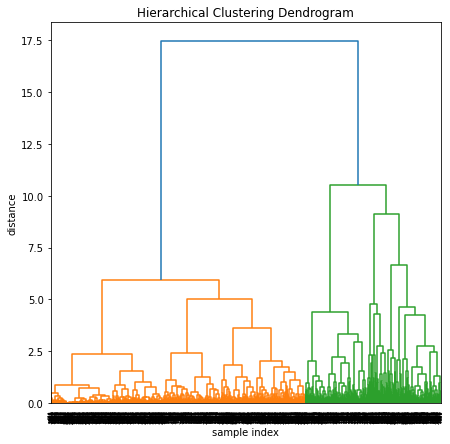

In [5]:
#hierarchical clustering
z = linkage(data_centre, 'ward')
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = z
)
plt.show()

In [6]:
# Specify distance to categorize dishes into clusters
# We do the test on the distance of 3, 1.2, 0.6. For these 3 test distances, the value of rmse decreases
T = 0.5

list_labels = fcluster(z, t = T, criterion = 'distance')

print('Cluster assignments:', list_labels)

Cluster assignments: [184  10  56 ...   3  83  12]


In [7]:
clusters = [np.where(i == list_labels)[0].tolist() for i in range(1, list_labels.max() + 1)]

# calculate the number of dishes under each cluster
for i in range(len(clusters)):
  if len(clusters[i]) <=1:
    list_labels[clusters[i][0]] = len(clusters)-1

# n_clusters = len(clusters)

# n_clusters

In [8]:
score_ecologique = pd.read_excel(r"Recipe_ingredients_Variables.xls",header=1)
score_ecologique.drop(score_ecologique.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1, inplace=True)
list_score_ecologique = score_ecologique["ecoscore_score"].tolist()

list_score_ecologique

[663.145,
 89.15200000000002,
 1152.4575,
 94.40800000000002,
 1259.81,
 596.745,
 1323.53,
 1104.56,
 809.0849999999999,
 765.943,
 1163.5230000000001,
 827.5,
 1147.8090000000002,
 1031.6475,
 478.217,
 895.1083333333333,
 326.202,
 432.04,
 463.3915,
 674.123,
 192.79,
 395.32,
 236.09099999999998,
 646.3240833333333,
 1415.0,
 990.596,
 2287.188,
 742.5,
 285.7895,
 537.974,
 160.63299999999998,
 1147.758,
 699.054,
 320.474,
 119.78625,
 1066.234,
 366.318,
 583.5450000000001,
 434.383,
 596.1676666666666,
 595.779,
 453.87,
 1516.908,
 1793.335,
 629.9216666666666,
 504.78499999999997,
 896.75,
 386.2,
 552.71,
 1081.04,
 1108.07,
 601.8525,
 -22.5,
 442.406875,
 789.1199999999999,
 720.9233333333334,
 1615.0,
 1261.552,
 357.055,
 392.89,
 505.17999999999995,
 1016.5049999999999,
 226.2645,
 1326.94,
 1268.32,
 954.7710000000001,
 1205.7820000000002,
 0.0,
 100.29125,
 111.13600000000001,
 494.724,
 849.9499999999999,
 1375.597,
 2109.708333333333,
 804.4010000000001,
 2702.1787

In [9]:
# Put the dishes in a dictionary according to its cluster
dict_cluster_plat = {}
for cluster1 in set(list_labels):
    dict_cluster_plat[cluster1] = []

for i in range(len(list_labels)):
    for cluster2 in set(list_labels):
        if list_labels[i] == cluster2:
            dict_cluster_plat[cluster2].append(plats.iloc[i])

# Find datas of each dish in the above dictionnary
dict_cluster_data = {}
for cluster3 in list_labels:
    data_frame = pd.DataFrame(data=None, columns=range(7), index=range(len(dict_cluster_plat[cluster3])))
    dict_cluster_data[cluster3] = data_frame

for cluster4 in list_labels:
    a = 0
    for plat in dict_cluster_plat[cluster4]:
        position_of_plat_in_data = list_plats.index(plat)
        data_of_this_plat = data_train.iloc[position_of_plat_in_data]
        #data_of_this_plat = data_centre[position_of_plat_in_data,:]############################
        dict_cluster_data[cluster4].iloc[a] = data_of_this_plat
        a += 1


In [10]:
# Specify the dish to be replaced
# Recommend n similar dishes from a nutritional point of view
# Keep n dishes from an ecological point of view

your_plat = "Beef Stroganoff"

n_recommandation = 10

n_keep = 3

In [11]:
# find your plat in which cluster
for cluster5 in dict_cluster_plat.keys():
    if your_plat in dict_cluster_plat[cluster5]:
        cluster_of_your_plat = cluster5
        break
        
cluster_of_your_plat

165

In [12]:
# find features of your plat

data_of_your_plat = data_train.iloc[list_plats.index(your_plat)]

data_of_your_plat

energy-kcal         51785.526500
fat                  3042.719200
sugars               2295.888920
fiber                 323.789250
proteins              399.436560
salt                   82.666471
nutriscore_score     2030.433000
Name: 478, dtype: float64

In [13]:
# calculate distances between your plat and each plat in the cluster and sort it

plats_recommanded = []
distances = []
for p in range(len(dict_cluster_plat[cluster_of_your_plat])):
    data_of_every_plat_in_this_cluster = dict_cluster_data[cluster_of_your_plat].iloc[p]
    distance = 0
    for l in range(7):
        distance += sqrt((data_of_your_plat[l] - data_of_every_plat_in_this_cluster[l]) ** 2)
    distances.append(distance)

distances_sorted = distances
distances_sorted.sort()
del distances_sorted[0]
distances_sorted = list(set(distances_sorted))

distances_sorted

[54784.90699125001, 54398.834183437495, 57959.68737541666]

In [14]:
# Recommend n similar dishes from a nutritional point of view

if len(dict_cluster_plat[cluster_of_your_plat]) >= n_recommandation:
    for m in range(n_recommandation):
        plat_recommanded = dict_cluster_plat[cluster_of_your_plat][distances.index(distances_sorted[m])]
        plats_recommanded.append(plat_recommanded)
else:
    plats_recommanded = dict_cluster_plat[cluster_of_your_plat]
    
plats_recommanded

['Beef Stroganoff',
 'Chicken Tetrazzini',
 'Hamburger Pepper Cheese Hotdish',
 'Garlic Pan- Roasted Game Hens']

In [15]:
# Keep n dishes from an ecological point of view

socre_plats_recommanded = []
for b in plats_recommanded:
    score = list_score_ecologique[list_plats.index(b)]
    socre_plats_recommanded.append(score)

socre_plats_recommanded_sorted = socre_plats_recommanded
socre_plats_recommanded_sorted.sort()

plats_keep = []
if len(socre_plats_recommanded_sorted) >= n_keep:
    for c in range(n_keep):
        plats_keep.append(list_plats[list_score_ecologique.index(socre_plats_recommanded_sorted[c])])
else:
    for s in socre_plats_recommanded_sorted:
        plats_keep.append(list_plats[list_score_ecologique.index(s)])

plats_keep

['Chicken Tetrazzini',
 'Hamburger Pepper Cheese Hotdish',
 'Garlic Pan- Roasted Game Hens']